In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from sklearn.linear_model import LinearRegression
from scipy.stats import circmean

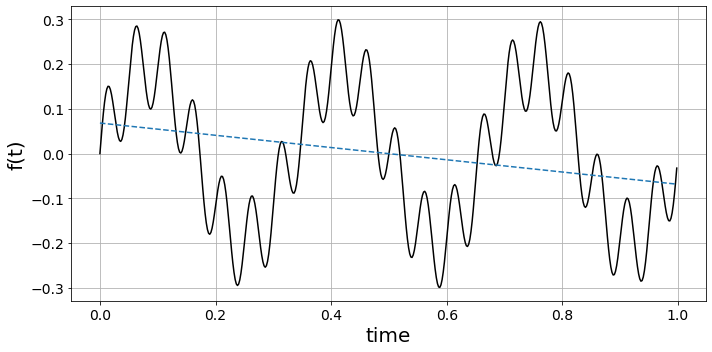

In [2]:

# create time index (between 0 and 1) with same number of time points as sample dataset. Assume we have 2 months time scale
Nt = 500
time_index = np.linspace(0,1-(1/Nt),Nt)

# sample time series with cycles at 10 times per month and 1.5 times per month in the form sin(2*t*pi*f)
x1 = 0.1 * np.sin(2*time_index*np.pi*20) + 0.2 * np.sin(2*time_index*np.pi*3)

# x1 = 0.6 * time_index + 0.1 * np.sin(2*time_index*np.pi*20) + 0.2 * np.sin(2*time_index*np.pi*3)

y = x1.reshape((-1, 1))
x = time_index.reshape((-1, 1))
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
plt.figure(figsize=(10,5))
plt.plot(time_index, x1, 'k')
plt.plot(time_index, y_pred, '--')
plt.xlabel('time', fontsize=20)
plt.ylabel('f(t)', fontsize=20)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('cycle_vs_linear_reg.png')
plt.show()

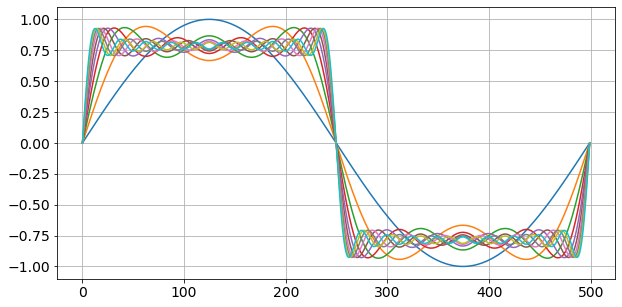

In [3]:
# this shows the cumulative sum of sine waves of increasing order
num_sines = 10
points = 500
t = np.linspace(0,2*np.pi,points)
y = np.zeros((num_sines,len(t)))
x = np.zeros(len(t));

for k in range(0,num_sines):
   x += np.sin(((2*k)+1)*t)/((2*k)+1)
   y[k,:] = x
    
plt.figure(figsize=(10,5))
for i in range(0, num_sines):
    plt.plot(y[i,:])
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)   
plt.show()

In [4]:
# Assume we have 2 months time scale
Nt = 60
time_index = np.linspace(0,1-(1/Nt),Nt) # this puts our x axis in arbitrary time units of 1/60 
Fs = 30 # sampling frequency in samples per month

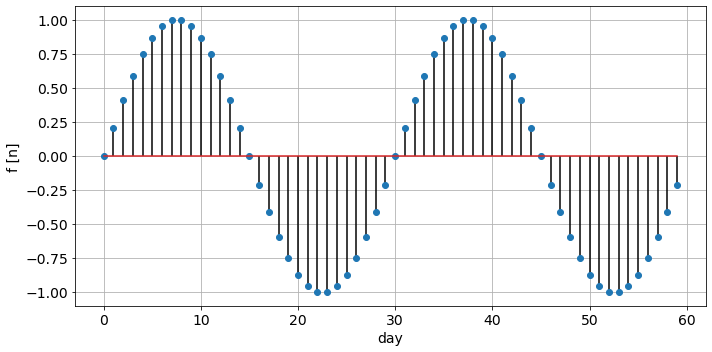

In [5]:

# sample time series with cycles at once per month
x1 = np.sin(2*time_index*np.pi*2)

# see what happens if you add noise? 
# x1 = np.sin(2*time_index*np.pi*2) + 0.2 * np.random.randn(len(time_index))

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
plt.figure(figsize=(10,5))
plt.stem(time_index*Nt,x1, 'k',use_line_collection=True)
plt.xlabel('day', fontsize=14)
plt.ylabel('f [n]', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('discrete_sine.png')
plt.show()

In [6]:
days_delay = 15 # for specific frequency
# sample time series with cycles at once per month
x2 = np.sin(2*time_index*np.pi*2 - (days_delay/30)*2*np.pi )

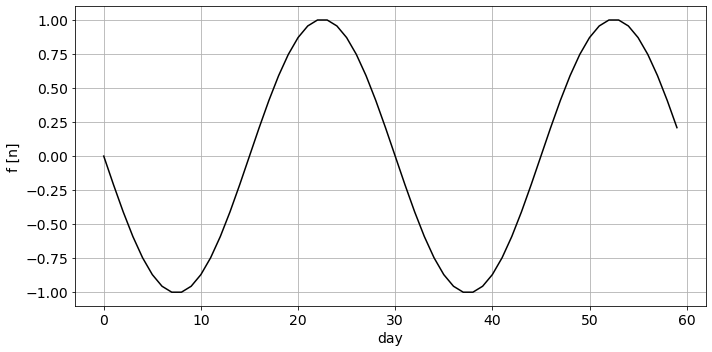

In [7]:

# rescale to be between -1 and 1
x2 = 2 *( x2-x2.min())/(x2.max() - x2.min()) - 1
plt.figure(figsize=(10,5))
plt.plot(time_index*Nt,x2, 'k')
plt.xlabel('day',fontsize=14)
plt.ylabel('f [n]',fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('shifted_sine.png')
plt.show()

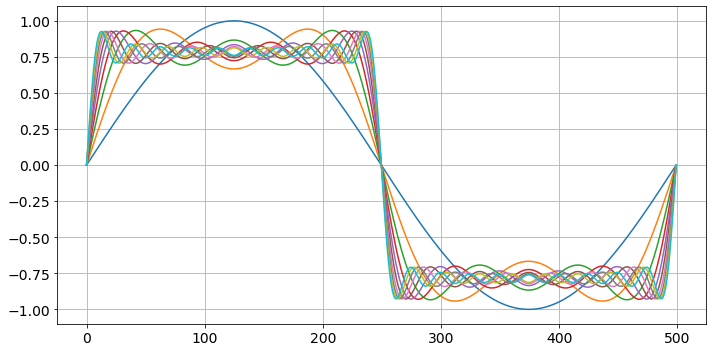

In [8]:
# this shows the cumulative sum of sine waves of increasing order
num_sines = 10
points = 500
t = np.linspace(0,2*np.pi,points)
y = np.zeros((num_sines,len(t)))
x = np.zeros(len(t));

for k in range(0,num_sines):
   x += np.sin(((2*k)+1)*t)/((2*k)+1)
   y[k,:] = x
    
plt.figure(figsize=(10,5))
for i in range(0, num_sines):
    plt.plot(y[i,:])
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('fourier.png')
plt.show()

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15. ]
(31,)
(60,)
fft output shape:  (60,)
(31,)


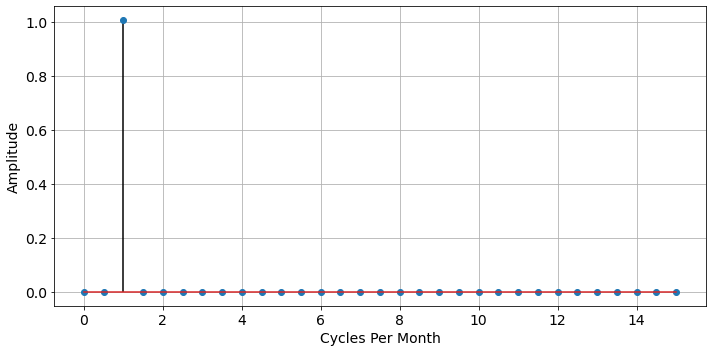

In [9]:

Nt = 60
Fs = 30 # sampling frequency in samples per month
f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
print(f)
print(f.shape)
fft1 = np.fft.fft(x1)
print(x1.shape)
print('fft output shape: ', fft1.shape)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
print(fft2.shape)
plt.figure(figsize=(10,5))
plt.stem(f, fft2, 'k')
plt.xlabel('Cycles Per Month', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('simplesineFFT.png')
plt.show()

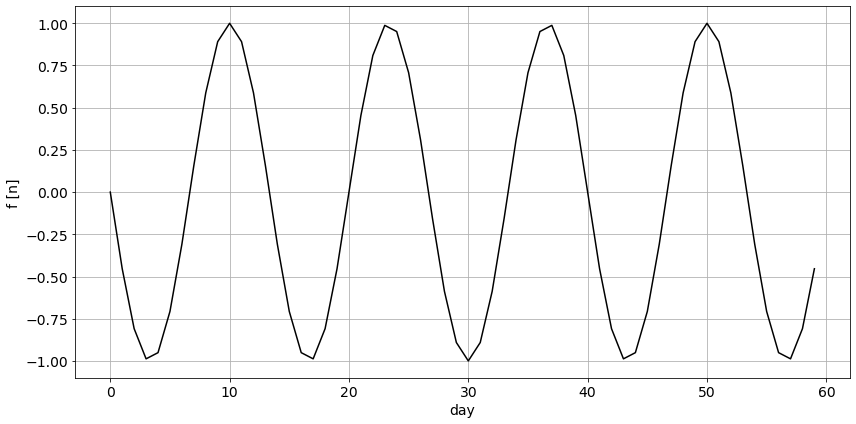

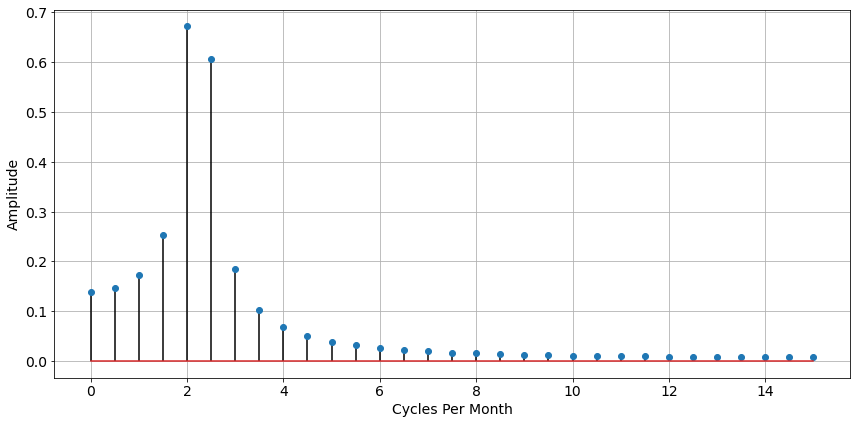

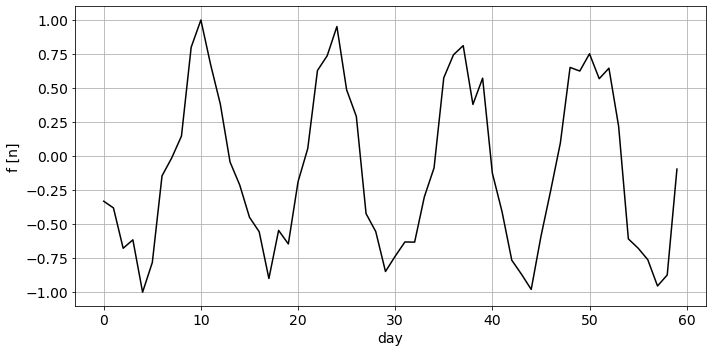

In [10]:

# sample time series with cycles at once per month
x1 = np.sin(2*time_index*np.pi*4.5 - (days_delay/30)*2*np.pi ) 
# and see what happens if we add noise 

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
plt.figure(figsize=(12,6))
plt.plot(time_index*Nt,x1, 'k')
plt.xlabel('day',  fontsize=14)
plt.ylabel('f [n]',  fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('simplesine2.png')
plt.show()

f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.figure(figsize=(12,6))
plt.stem(f, fft2, 'k')
plt.xlabel('Cycles Per Month', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)

plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('simplesine2FFT.png')
plt.show()

# sample time series with cycles at once per month
#x1 = np.sin(2*time_index*np.pi*4.5 - (days_delay/30)*2*np.pi ) 
# and see what happens if we add noise 
x1 = np.sin(2*time_index*np.pi*4.5 - (days_delay/30)*2*np.pi ) + 0.2*np.random.randn(len(time_index))

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
plt.figure(figsize=(10,5))
plt.plot(time_index*Nt,x1, 'k')
plt.xlabel('day', fontsize=14)
plt.ylabel('f [n]', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('simplesine3.png')
plt.show()

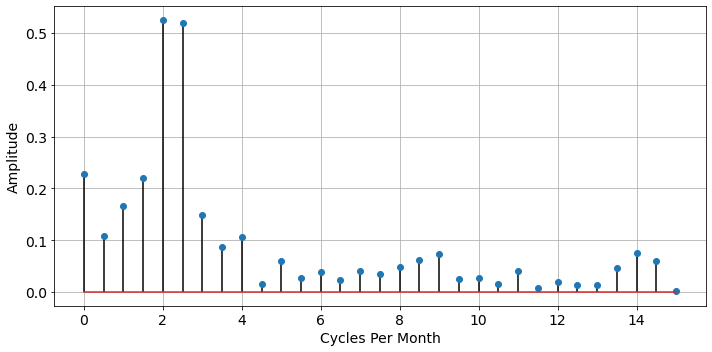

In [11]:

f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.figure(figsize=(10,5))
plt.stem(f, fft2, 'k')
plt.xlabel('Cycles Per Month', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('simplesine3FFT.png')
plt.show()

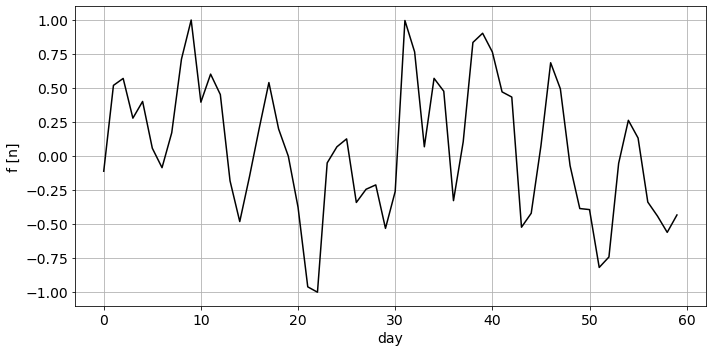

In [12]:

# sample time series with cycles at once per month, 4 times per month and twice a week and some noise
x1 = np.sin(2*time_index*np.pi*2) + np.sin(2*time_index*np.pi*8) + 0.5*np.sin(2*time_index*np.pi*16) + 0.4*np.random.randn(Nt)
# notice that our once per month is written here as twice every two months, because of our time index,
# which is 60 days of data (i.e. two months) squashed into 0 - 1. 

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1

plt.figure(figsize=(10,5))
plt.plot(time_index*Nt,x1, 'k')
plt.xlabel('day',fontsize=14)
plt.ylabel('f [n]',fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('timeseries1.png')
plt.show()

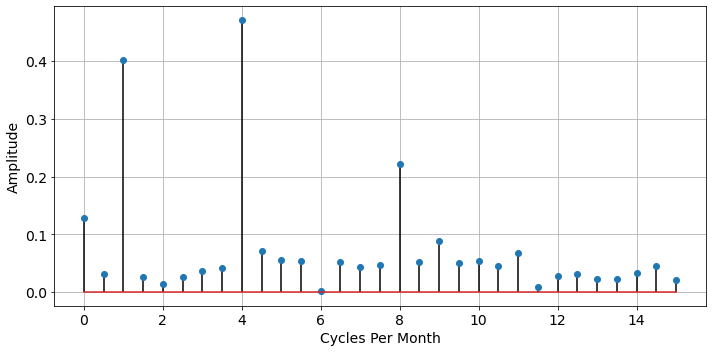

In [13]:
f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.figure(figsize=(10,5))
plt.stem(f, fft2, 'k')
plt.xlabel('Cycles Per Month',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)

plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('timeseries1fft.png')
plt.show()

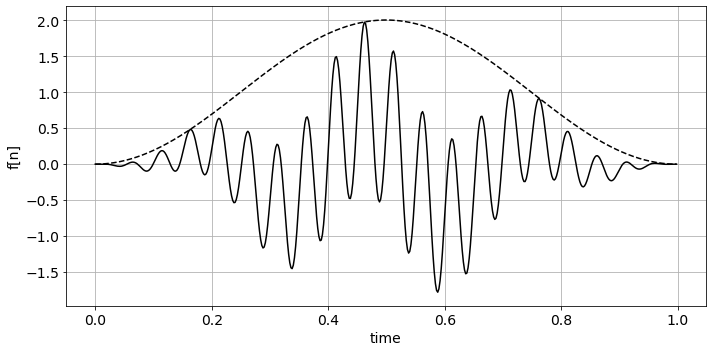

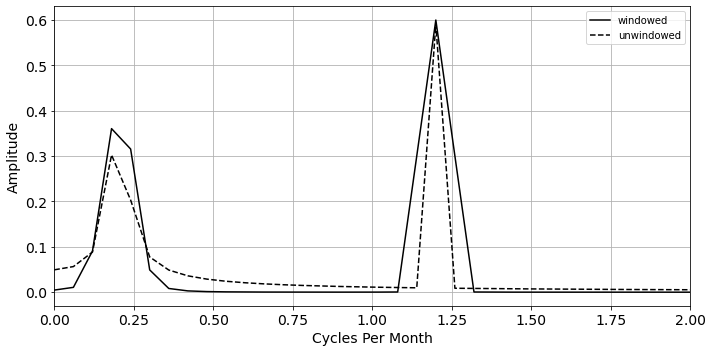

In [14]:
# create time index (between 0 and 1) with same number of time points as sample dataset. Assume we have 2 months time scale
Nt = 500
time_index = np.linspace(0,1-(1/Nt),Nt)

# sample time series with cycles at 10 times per month and 1.5 times per month in the form sin(2*t*pi*f)
x1 = np.hanning(500) *( 0.6 *np.sin(2*time_index*np.pi*20) +  0.4*np.sin(2*time_index*np.pi*3.4 - 2))

acf = Nt /( np.hanning(500).sum())
x1 = x1 * acf
# x1 = 0.6 * time_index + 0.1 * np.sin(2*time_index*np.pi*20) + 0.2 * np.sin(2*time_index*np.pi*3)

y = x1.reshape((-1, 1))
x = time_index.reshape((-1, 1))
plt.figure(figsize=(10,5))
plt.plot(time_index, x1, 'k')
plt.plot(time_index, acf * np.hanning(500), '--', c='k')
plt.xlabel('time', fontsize=14)
plt.ylabel('f[n]', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('hanning.png')
plt.show()

f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.figure(figsize=(10,5))
plt.plot(f, fft2, 'k',label='windowed')

# create time index (between 0 and 1) with same number of time points as sample dataset. Assume we have 2 months time scale
Nt = 500
time_index = np.linspace(0,1-(1/Nt),Nt)

# sample time series with cycles at 10 times per month and 1.5 times per month in the form sin(2*t*pi*f)
x1 = ( 0.6 *np.sin(2*time_index*np.pi*20) +  0.4*np.sin(2*time_index*np.pi*3.4 - 2))

# x1 = 0.6 * time_index + 0.1 * np.sin(2*time_index*np.pi*20) + 0.2 * np.sin(2*time_index*np.pi*3)

y = x1.reshape((-1, 1))
x = time_index.reshape((-1, 1))
f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.plot(f, fft2, '--', c='k', label='unwindowed')
plt.xlim(0,2)
plt.legend()
plt.xlabel('Cycles Per Month', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('windowedfft.png')
plt.show()

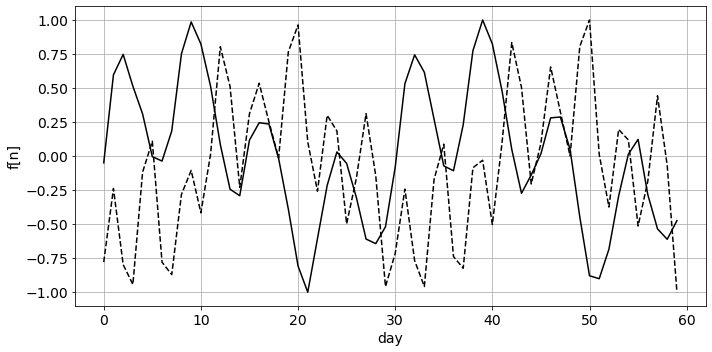

In [58]:
# Assume we have 2 months time scale
Nt = 60
time_index = np.linspace(0,1-(1/Nt),Nt) # this puts our x axis in arbitrary time units of 1/60 
Fs = 30 # sampling frequency in samples per month
# sample time series both with cycles (once a week and once per month) with phase offset and some noise
# the second series will also have an additional cycle of twice per week

x1 = np.sin(2*time_index*np.pi*2) + np.sin(2*time_index*np.pi*8) + 0.1 * np.random.randn(Nt)

x2 =  np.sin(2*time_index*np.pi*16) + np.sin(2*time_index*np.pi*2 - (10/30)*2*np.pi) + 0.5 * np.sin(2*time_index*np.pi*8 - (10/30)*2*np.pi) + 0.1 * np.random.randn(Nt) 

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
x2 = 2 *( x2-x2.min())/(x2.max() - x2.min()) - 1

plt.figure(figsize=(10,5))
plt.plot(time_index*Nt,x1, 'k')
plt.plot(time_index*Nt,x2, '--', c='k')
plt.xlabel('day', fontsize=14)
plt.ylabel('f[n]', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('bivariate1.png')
plt.show()

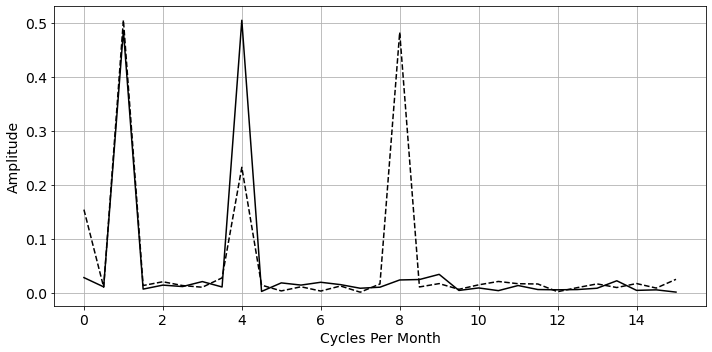

In [59]:
f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
fft3 = np.fft.fft(x2)
fft4 = 2*np.abs(fft3[0:int(Nt/2)+1]/Nt)
plt.figure(figsize=(10,5))
plt.plot(f, fft2, 'k')
plt.plot(f, fft4, '--', c='k')
plt.xlabel('Cycles Per Month', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('bivariate1fft.png')
plt.show()

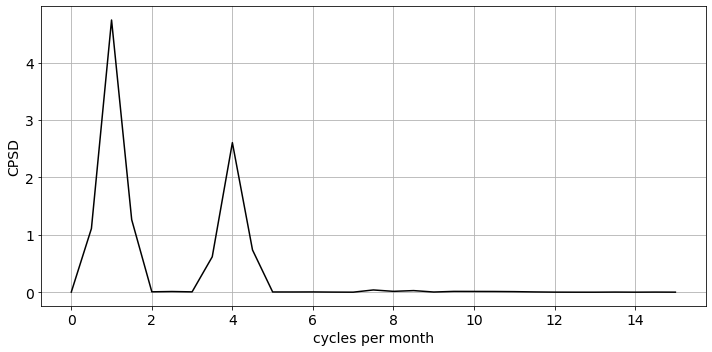

In [17]:

f1, Pxy = signal.csd(x1, x2, nperseg=Nt)
plt.figure(figsize=(10,5))
plt.plot(f, np.abs(Pxy), 'k')
plt.xlabel('cycles per month', fontsize=14)
plt.ylabel('CPSD', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('CPSD1.png')
plt.show()

In [18]:
num_participants = 100 # participants = couples
Nt = 60
Fs = 30
time_index = np.linspace(0,1-(1/Nt),Nt) # this puts our x axis in arbitrary time units of 1/60 
# we can think of these as two groups of individuals who are in a relationship with each other columnwise
males = np.zeros((len(time_index), num_participants))
females = np.zeros((len(time_index), num_participants))

# we will then further subdivide these into couples for whom their once-per-month cycles are offset by x-days phase, 
# and couples for whom their once-per-month cycles are offset by y-days phase. 

x = 15 # 15 corresponds with 180 degrees out of phase (or pi rads)
y = 8 # 8 corresponds with 96 degrees out of phase (or approx pi/2 rads)

for i in range(0, int(num_participants/2), 1):

    males[:, i] = np.sin(2*time_index*np.pi*2) + 0.1 * np.random.randn(Nt)

    females[:, i] =  np.sin(2*time_index*np.pi*2 + ((x/30)*2*np.pi+np.random.randn(Nt))) +  np.sin(2*time_index*np.pi*8)  + 0.1 * np.random.randn(Nt) 


for i in range(int(num_participants/2), num_participants, 1):

    males[:, i] = np.sin(2*time_index*np.pi*2) + 0.1 * np.random.randn(Nt)

    females[:, i] =  np.sin(2*time_index*np.pi*2 + ((y/30)*2*np.pi+np.random.randn(Nt))) +  np.sin(2*time_index*np.pi*8)   + 0.1 * np.random.randn(Nt) 

print(males.shape)
print(females.shape)

# normalise the data by individual (i.e. individual mean centre):
for i in range(males.shape[1]):
    males[:,i] = ( males[:,i] - males[:,i].mean() ) / males[:, i].std()
    females[:,i] = ( females[:,i] - females[:,i].mean() ) / females[:, i].std()
    
f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt

fft_male1 = np.fft.fft(males, axis=0)

fft_male2 = 2*np.abs(fft_male1[0:int(Nt/2)+1]/Nt)

fft_female1 = np.fft.fft(females, axis=0)

fft_female2 = 2*np.abs(fft_female1[0:int(Nt/2)+1]/Nt)
fft_male2.shape

(60, 100)
(60, 100)


(31, 100)

1.0000000000000002
power response:
60.0
amplitude response:


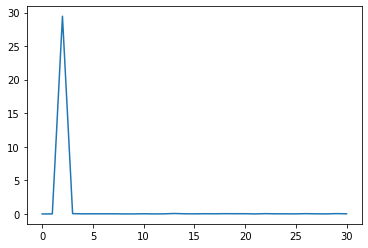

In [19]:
print(males[:,0].var())
print('power response:')
plt.plot(((np.abs(fft_male1[:,0])**2)/Nt)[:int(Nt/2)+1])

print(((np.abs(fft_male1[:,0])**2)/Nt).sum())
print('amplitude response:')


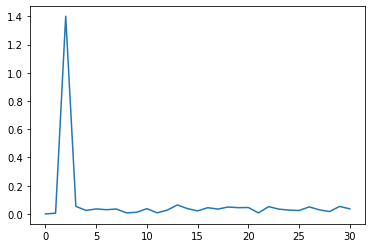

In [20]:
plt.plot(fft_male2[:,0])

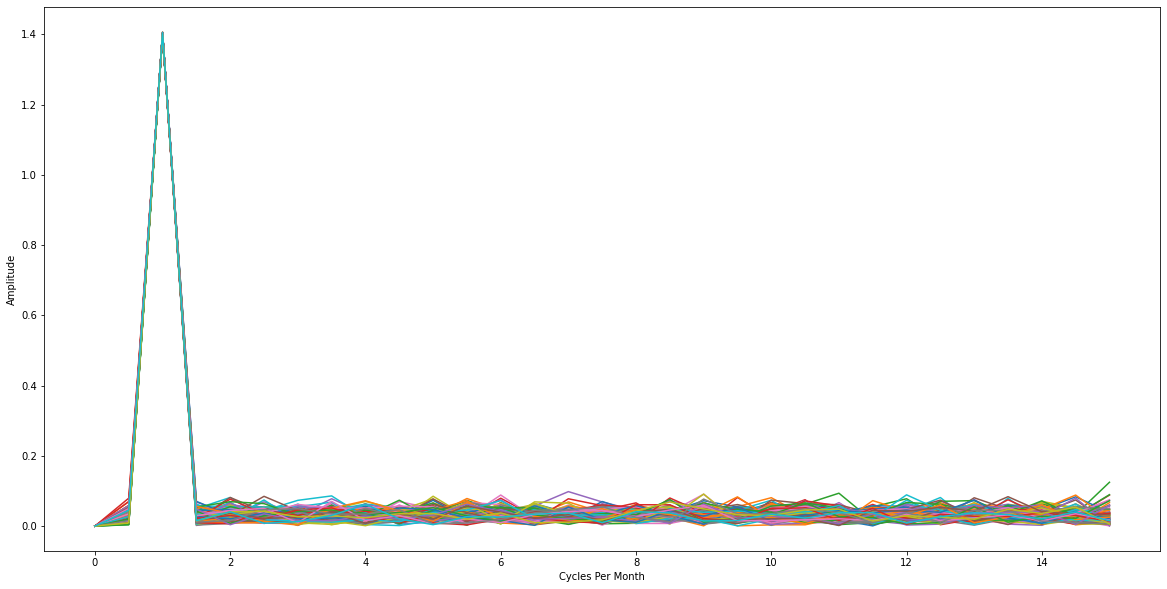

In [21]:
# plot ALL male plots:
plt.figure(figsize=(20,10))
plt.plot(f, fft_male2)
plt.xlabel('Cycles Per Month')
plt.ylabel('Amplitude')
plt.show()

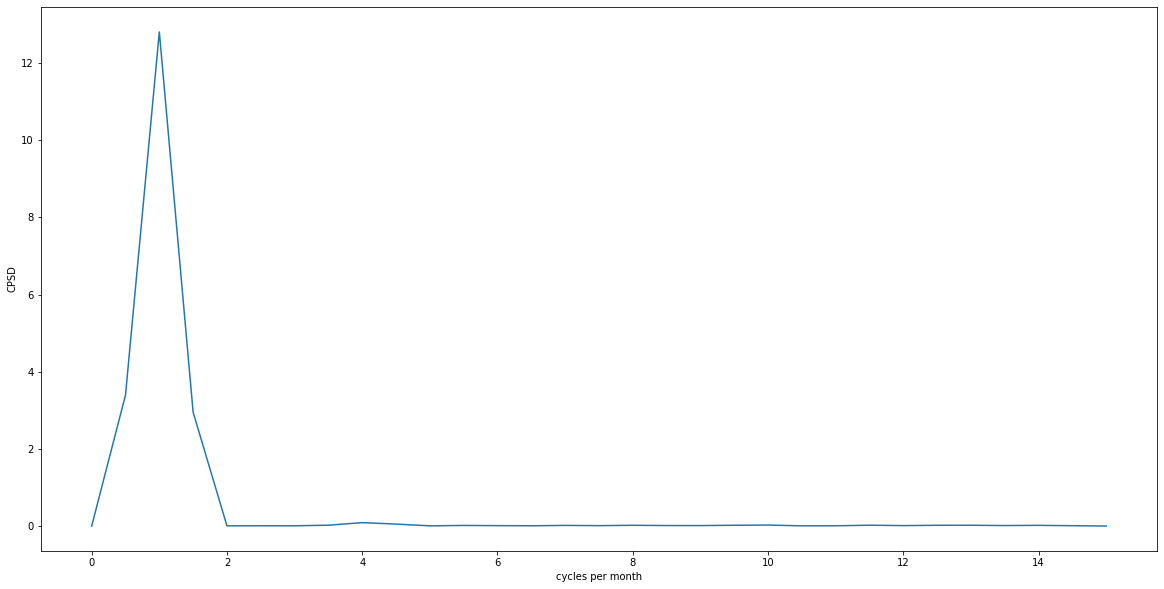

In [22]:

f1, Pxy = signal.csd(males, females, nperseg=Nt, axis=0)

Pxy_mean = np.mean(Pxy, axis=1)

plt.figure(figsize=(20,10))
plt.plot(f, np.abs(Pxy_mean))
plt.xlabel('cycles per month')
plt.ylabel('CPSD')
plt.show()

In [23]:
cpsd_phase = np.angle(Pxy)
for i in range(cpsd_phase.shape[0]):
    for j in range(cpsd_phase.shape[1]):

        if cpsd_phase[i,j] <=0:
            cpsd_phase[i,j] += 2*np.pi

couple_av_phase = circmean(cpsd_phase, axis=1)
# these means tell us the average phase offsets for each frequency between partners (dyadic)

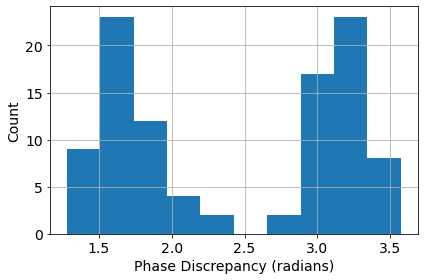

In [24]:
plt.hist(cpsd_phase[2,:], bins=10)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Phase Discrepancy (radians)', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('cpsdphase.png')

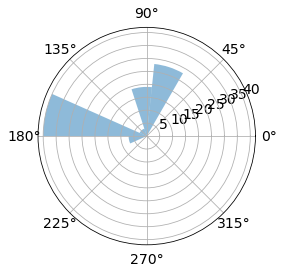

In [25]:

hist_bins = 15  
bins = np.linspace(0, 2 * np.pi, hist_bins + 1)
n, _, _ = plt.hist(cpsd_phase[2], bins)

plt.clf()
w = 2 * np.pi / hist_bins
ax = plt.subplot(1, 1, 1, projection='polar')
pmfs = ax.bar(bins[:hist_bins], n, width=w, bottom=0.0)
for bar in pmfs:
    bar.set_alpha(0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.savefig('cpsdphasepolar.png')
plt.show()

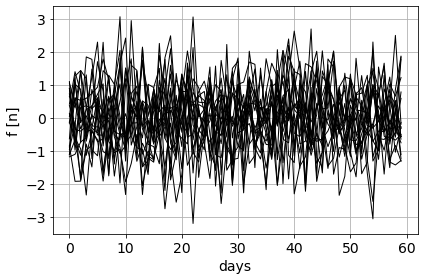

In [26]:
noise_samples = np.random.randn(Nt,20)
plt.plot(noise_samples, linewidth=1, c='k')
plt.ylabel('f [n]',fontsize=14)
plt.xlabel('days',fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('noiseseries.png')
plt.show()

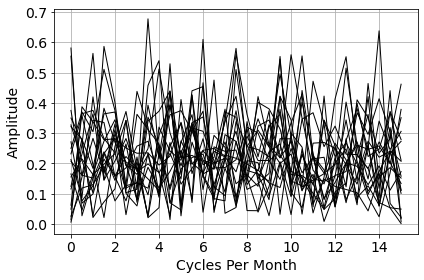

In [27]:
f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(noise_samples, axis=0)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.plot(f, fft2, linewidth=1, c='k')
plt.xlabel('Cycles Per Month',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('noisefft.png')
plt.show()

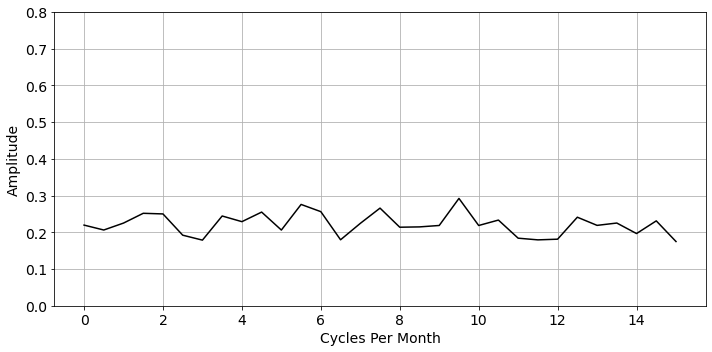

In [28]:

noise_fft_av = np.mean(fft2,axis=1)
plt.figure(figsize=(10, 5))
plt.plot(f, noise_fft_av, 'k')
plt.ylim(0,0.8)
plt.xlabel('Cycles Per Month', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('noisefftmean.png')
plt.show()

In [29]:
# preallocate memory:
n = 100
x1_rands = np.zeros([len(time_index),n])

for i in range(n):
    x1_rands[:,i] = np.random.permutation(x1)
    
fft_rands1 = np.fft.fft(x1_rands, axis=0)
fft_rands2 = 2*np.abs(fft_rands1[0:int(Nt/2)+1]/Nt)  # compute the ffts for all the randomised signals

fft1 = np.fft.fft(x1)
fft2 = fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)

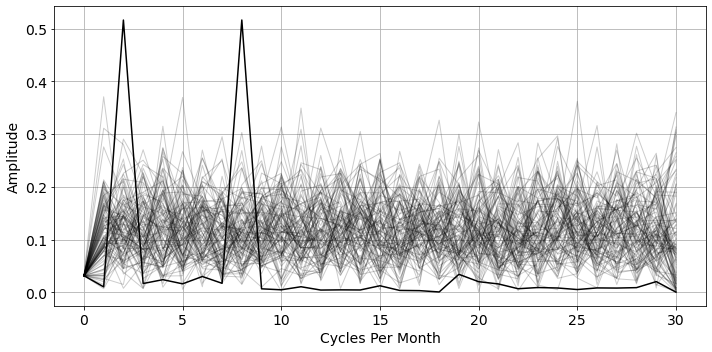

In [31]:

plt.figure(figsize=(10,5))
plt.plot(fft_rands2, c='k',alpha=0.2, linewidth=1)
plt.plot(fft2, 'k')
plt.xlabel('Cycles Per Month',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('example_permutedfft.png')
plt.show()

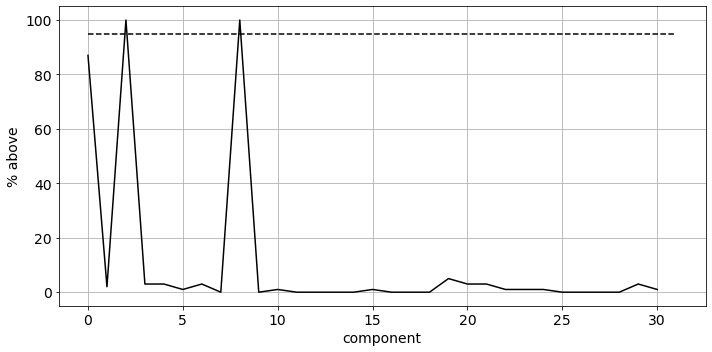

In [32]:
# here is the code for counting the number of times our signal is above the noise signals:

counts = np.zeros(len(fft2))

for i in range(n):
    for j in range(len(fft2)):
        to_compare = fft_rands2[j,i]
        coeff = fft2[j]
        if coeff > to_compare:
            counts[j] += 1
  
counts = counts / n * 100

plt.figure(figsize=(10,5))
plt.plot(counts, 'k')
plt.plot(np.linspace(0,len(counts),len(counts)), np.array([95]*len(counts)), 'k--')
plt.xlabel('component',fontsize=14)
plt.ylabel('% above',fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('counts.png')
plt.show()


1.4686653134558256 1.4686653134558256


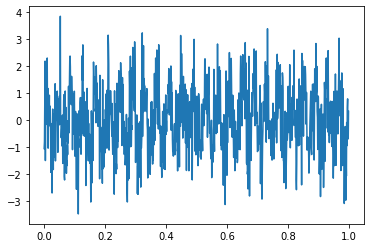

1.2119309736011938

In [33]:
nt = 1000
x = np.linspace(0, 1 - 1/nt, nt)
y = np.sin(50*np.pi * x) + np.random.randn(nt)
print(y.var(), np.random.permutation(y).var())
plt.plot(x,y)
plt.show()
np.sqrt(np.mean(y**2))

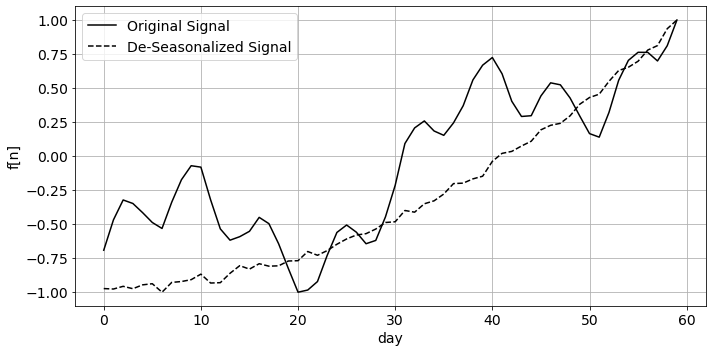

In [57]:
# Assume we have 2 months time scale
Nt = 60
time_index = np.linspace(0,1-(1/Nt),Nt) # this puts our x axis in arbitrary time units of 1/60 
Fs = 30 # sampling frequency in samples per month
# sample time series both with cycles (once a week and once per month) with phase offset and some noise
# the second series will also have an additional cycle of twice per week
N = 0.1 * np.random.randn(Nt)
x1 = 10 * time_index**2 + 2 * np.sin(2*time_index*np.pi*2) + np.sin(2*time_index*np.pi*8) + N
x2 =  10 * time_index**2 + N

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
x2 = 2 *( x2-x2.min())/(x2.max() - x2.min()) - 1

plt.figure(figsize=(10,5))
plt.plot(time_index*Nt,x1, 'k', label='Original Signal')
plt.plot(time_index*Nt,x2, 'k--', label='De-Seasonalized Signal')
plt.xlabel('day', fontsize=14)
plt.ylabel('f[n]', fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('deseasonalizing.png')
plt.show()